In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree, ensemble, metrics, cross_validation, externals
%matplotlib inline

In [304]:
data = pd.read_csv("output2.csv")

In [305]:
data = data.drop('Unnamed: 0', 1)

In [306]:
data = data.dropna()

In [307]:
data.columns

Index([u'campaign_id', u'reach', u'cpa_min', u'cpa_max', u'cpa_median',
       u'cpc_min', u'cpc_max', u'cpc_median', u'cpm_min', u'cpm_max',
       u'cpm_median', u'clicks', u'spent', u'impressions', u'conversions',
       u'objective', u'date', u'cost_per_click', u'cost_per_impression',
       u'cost_per_conversion', u'Objective_EVENT_RESPONSES',
       u'Objective_LEAD_GENERATION', u'Objective_LOCAL_AWARENESS',
       u'Objective_MOBILE_APP_ENGAGEMENT', u'Objective_MOBILE_APP_INSTALLS',
       u'Objective_NONE', u'Objective_PAGE_LIKES',
       u'Objective_POST_ENGAGEMENT', u'Objective_VIDEO_VIEWS',
       u'Objective_WEBSITE_CLICKS', u'Objective_WEBSITE_CONVERSIONS',
       u'campaign_group_id', u'bidStrategy', u'maxBid',
       u'Bid_Type_CONVERSION_OPTIMIZE', u'Bid_Type_OPTIMIZE',
       u'Bid_Type_ROTATE', u'Bid_Type_ROTATE_INDEFINITELY',
       u'Bid_Type_automated', u'Bid_Type_cpc', u'Bid_Type_ocpm'],
      dtype='object')

In [308]:
def drop_cost_per_conversion_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.cost_per_conversion.quantile(.25)
    Q2 = df.cost_per_conversion.quantile(.5)
    Q3 = df.cost_per_conversion.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[(df.cost_per_conversion < Q1 - 1.5 * IQR) | (df.cost_per_conversion > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', len(df)

In [309]:
def drop_reach_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.reach.quantile(.25)
    Q2 = df.reach.quantile(.5)
    Q3 = df.reach.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[(df.reach < Q1 - 1.5 * IQR) | (df.reach > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', len(df)

In [310]:
drop_cost_per_conversion_outliers(data)

Dropping outliers
- n (before) = 709
- Q1         = 0.177419354839 ($M)
- Q2/Median  = 0.520602836879 ($M)
- Q3         = 2.47513513514 ($M)
- n (after)  = 568


In [311]:
drop_reach_outliers(data)

Dropping outliers
- n (before) = 568
- Q1         = 50750.0 ($M)
- Q2/Median  = 354500.0 ($M)
- Q3         = 1660000.0 ($M)
- n (after)  = 495


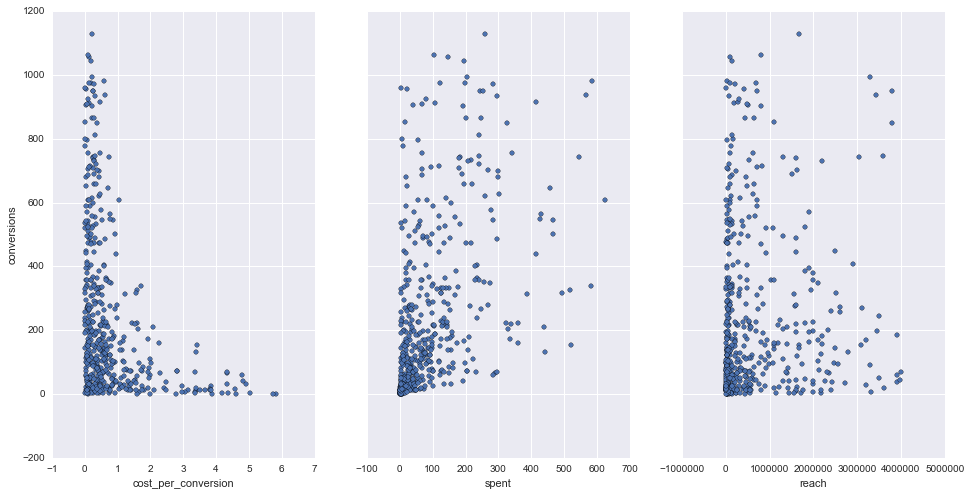

In [312]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='cost_per_conversion', y='conversions', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='spent', y='conversions', ax=axs[1])
data.plot(kind='scatter', x='reach', y='conversions', ax=axs[2])

In [313]:
len(data)

495

In [314]:
training_df = data.sample(frac = .6, random_state = 1)
test_df = data.drop(training_df.index)

In [315]:
training_df.reset_index(inplace = True)
test_df.reset_index(inplace = True)

In [ ]:
training_df = training_df.dropna()
test_df = test_df.dropna()

**features**

- spent
- reach
- cost_per_conversion
- cost_per_click
- cost_per_impression
- Objective_EVENT_RESPONSES,Objective_LEAD_GENERATION .....  
- bidStrategy
- maxBid
- cpa_min 
- cpa_max  
- cpa_median
- cpc_min 
- cpc_max
- cpc_median
- cpm_min
- cpm_max
- cpm_median
- objective
- date
- Bid_Type_CONVERSION_OPTIMIZE
- Bid_Type_OPTIMIZE
- Bid_Type_ROTATE
- Bid_Type_ROTATE_INDEFINITELY
- Bid_Type_automated
- Bid_Type_cpc
- Bid_Type_ocpm

** response **

Conversions : Number of conversions for a particular campaign 

In [372]:
model = smf.ols(formula = 'conversions ~ spent + cost_per_conversion + cost_per_click + reach + Objective_PAGE_LIKES + Objective_MOBILE_APP_INSTALLS +Objective_WEBSITE_CONVERSIONS  + Bid_Type_automated + Bid_Type_cpc+ Bid_Type_ocpm + maxBid', data = training_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            conversions   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     27.51
Date:                Tue, 19 Apr 2016   Prob (F-statistic):           8.92e-39
Time:                        14:51:29   Log-Likelihood:                -1957.8
No. Observations:                 297   AIC:                             3940.
Df Residuals:                     285   BIC:                             3984.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                       207.2853     56.124      3.693      0.000        96.815   317.756
spent                             1.5790      0.108     14.643      0.000         1.367     1.791
cost_per_conversion             -63.7858     15.858     -4.022      0.000       -95.000   -32.571
cost_per_click                 -110.8477     31.372     -3.533      0.000      -172.599   -49.097
reach                          1.939e-05   1.19e-05      1.631      0.104        -4e-06  4.28e-05
Objective_PAGE_LIKES            -74.3487     46.119     -1.612      0.108      -165.126    16.429
Objective_MOBILE_APP_INSTALLS     1.6220     79.749      0.020      0.984      -155.350   158.594
Objective_WEBSITE_CONVERSIONS    31.4294     43.365      0.725      0.469       -53.928   116.786
Bid_Type_automated              -37.4834     56.355     -0.665      0.507      -148.408    73.441
Bid_Type_cpc                    -57.1777     78.119     -0.732      0.465      -210.941    96.586
Bid_Type_ocpm                     7.3315     68.688      0.107      0.915      -127.868   142.531
maxBid                          -12.4672     55.427     -0.225      0.822      -121.565    96.631
==============================================================================
Omnibus:                       75.011   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.350
Skew:                           1.316   Prob(JB):                     1.66e-32
Kurtosis:                       5.213   Cond. No.                     1.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Pvalues and Hypothesis testing 

- If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)
- In this case, the p-value for spent, cost_per_conversion, cost_per_click is far less than 0.05, and so we believe that there is a relationship between them and conversions.

- A "unit" increase in spending is associated with a 1.57 "unit" increase in Conversions.
- Or more clearly: An additional $1,000 spent ads is associated with an increase in 1570 conversion.

## R^2

In [373]:
model.rsquared

0.51495452634317807

R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

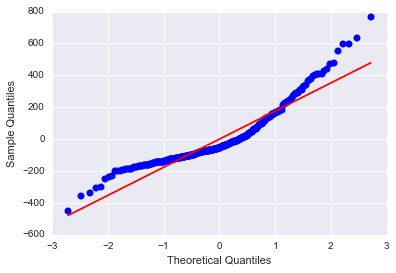

In [374]:
# Plotting qqolots to check normality assumption - Plot of the quantiles of the first dataset (vertically) against the quantiles of the second’s (horizontally)
figure = sm.qqplot(model.resid, line = 's')

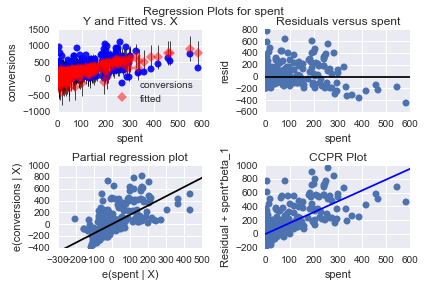

In [375]:
# to check modeling assumptions with respect to a single regressor
figure = sm.graphics.plot_regress_exog(model, 'spent')

## Better Model ? 

** How do I decide which features to include in a linear model? Here's one idea:**
- Try different models, and only keep predictors in the model if they have small p-values.
Check whether the R-squared value goes up when you add new predictors.
What are the drawbacks to this approach?
Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are pure noise, 5 of them (on average) will still be counted as significant.
R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize.

In [376]:
model2 = smf.ols(formula = 'conversions ~ spent + cost_per_conversion + cost_per_click', data = training_df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            conversions   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     98.05
Date:                Tue, 19 Apr 2016   Prob (F-statistic):           5.78e-44
Time:                        14:52:56   Log-Likelihood:                -1962.0
No. Observations:                 297   AIC:                             3932.
Df Residuals:                     293   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             184.3354     15.806     11.662      0.000       153.227   215.443
spent                   1.5879      0.106     15.031      0.000         1.380     1.796
cost_per_conversion   -60.2832     12.736     -4.733      0.000       -85.348   -35.218
cost_per_click       -120.4702     29.344     -4.106      0.000      -178.221   -62.719
==============================================================================
Omnibus:                       75.148   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.550
Skew:                           1.329   Prob(JB):                     4.09e-32
Kurtosis:                       5.150   Cond. No.                         392.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [377]:
model2.rsquared

0.5009788955235488

R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.
So is there a better approach to feature selection? Cross-validation. It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best generalize to out-of-sample data. 

## Plotting the Least Squares Line

In [378]:
model3 = smf.ols(formula = 'conversions ~ spent', data = training_df).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            conversions   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     135.0
Date:                Tue, 19 Apr 2016   Prob (F-statistic):           6.06e-26
Time:                        14:53:09   Log-Likelihood:                -2009.3
No. Observations:                 297   AIC:                             4023.
Df Residuals:                     295   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    102.1241     16.006      6.380      0.000        70.623   133.625
spent          1.3977      0.120     11.617      0.000         1.161     1.635
==============================================================================
Omnibus:                       67.607   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.407
Skew:                           1.229   Prob(JB):                     2.63e-27
Kurtosis:                       4.961   Cond. No.                         174.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [379]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'spent': [data.spent.min(), data.spent.max()]})
X_new.head()

,spent
0,0.03
1,624.86


In [380]:
# make predictions for those x values and store them
preds = model3.predict(X_new)
preds

array([ 102.16606181,  975.50652939])

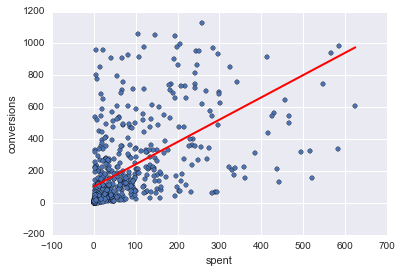

In [381]:
# first, plot the observed data
data.plot(kind='scatter', x='spent', y='conversions')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [ ]:
X = data[data.columns.values]
X.drop('conversions', axis = 1, inplace = True)
X.drop('clicks', axis = 1, inplace = True)
X.drop('impressions', axis = 1, inplace = True)

y = data.conversions

In [ ]:
len(X)

In [ ]:
X.head()

In [ ]:
X.drop('bidStrategy', axis = 1, inplace = True)
X.drop('objective', axis = 1, inplace = True)
X.drop('campaign_group_id', axis = 1, inplace = True)

In [ ]:
X.cost_per_click = X.cost_per_click.round(decimals=2)
X.cost_per_impression = X.cost_per_impression.round(decimals=2)
X.cost_per_conversion = X.cost_per_conversion.round(decimals=2)

Now we have to split the datasets into training and validation. The training data will be used to generate the trees that will constitute the final averaged model.

In [ ]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size = 0.4)

### Linear Regression - scikit-learn

We use cross validation to compare between models and choose the model with the best cross validation value. Once we discover that we need to create a final model and then predict using it

In [389]:
train_df_X = training_df[ ['spent','cost_per_conversion','cost_per_click'] ]
train_df_y = training_df['conversions']

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_df_X, train_df_y, cv = 10).mean()

0.40624111090910675

In [390]:
train_df_X = training_df[ ['spent'] ]
train_df_y = training_df['conversions']

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_df_X, train_df_y, cv = 10).mean()

0.21213237661083778

In [393]:
train_df_X = training_df[ ['spent','cost_per_conversion'] ]
train_df_y = training_df['conversions']

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_df_X, train_df_y, cv = 10).mean()

0.38485054574787619

In [394]:
train_df_X = training_df[ ['spent','cost_per_click'] ]
train_df_y = training_df['conversions']

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_df_X, train_df_y, cv = 10).mean()

0.36015237316522819

In [396]:
training_df['spent * cost_per_conversion'] = training_df.spent * training_df.cost_per_conversion

In [398]:
train_df_X = training_df[ ['spent','cost_per_conversion','spent * cost_per_conversion'] ]
train_df_y = training_df['conversions']

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_df_X, train_df_y, cv = 10).mean()

0.47482648793605781

In [399]:
train_df_X = training_df[ ['spent','cost_per_conversion','spent * cost_per_conversion','reach'] ]
train_df_y = training_df['conversions']

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_df_X, train_df_y, cv = 10).mean()

0.47781732476038652

# Regression Decision Trees

In [218]:
model = tree.DecisionTreeRegressor()
model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

### Calculating MSE (Mean squared error regression loss)

In [219]:
train_y_hat = model.predict(train_X)
print np.sqrt(metrics.mean_squared_error(train_y, train_y_hat))

test_y_hat = model.predict(test_X)
print np.sqrt(metrics.mean_squared_error(test_y, test_y_hat))

0.0
105.588658429


In [220]:
model = tree.DecisionTreeRegressor(max_depth = 4)
model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

### Calculate Features Importance

In [221]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.56172771516256303, 'clicks'),
 (0.38957847284239799, 'cost_per_conversion'),
 (0.024497866140200251, 'spent'),
 (0.01182488350160881, 'impressions'),
 (0.011619538566606816, 'cpm_median'),
 (0.00075152378662308897, 'cpm_max'),
 (0.0, 'reach'),
 (0.0, 'maxBid'),
 (0.0, 'date'),
 (0.0, 'cpm_min'),
 (0.0, 'cpc_min'),
 (0.0, 'cpc_median'),
 (0.0, 'cpc_max'),
 (0.0, 'cpa_min'),
 (0.0, 'cpa_median'),
 (0.0, 'cpa_max'),
 (0.0, 'cost_per_impression'),
 (0.0, 'cost_per_click'),
 (0.0, 'campaign_id'),
 (0.0, 'Objective_WEBSITE_CONVERSIONS'),
 (0.0, 'Objective_WEBSITE_CLICKS'),
 (0.0, 'Objective_VIDEO_VIEWS'),
 (0.0, 'Objective_POST_ENGAGEMENT'),
 (0.0, 'Objective_PAGE_LIKES'),
 (0.0, 'Objective_NONE'),
 (0.0, 'Objective_MOBILE_APP_INSTALLS'),
 (0.0, 'Objective_MOBILE_APP_ENGAGEMENT'),
 (0.0, 'Objective_LOCAL_AWARENESS'),
 (0.0, 'Objective_LEAD_GENERATION'),
 (0.0, 'Objective_EVENT_RESPONSES'),
 (0.0, 'Bid_Type_ocpm'),
 (0.0, 'Bid_Type_cpc'),
 (0.0, 'Bid_Type_automated'),
 (0.0, 'Bid_Type_ROT

## Random Forest Classifier

In [222]:
model = ensemble.RandomForestClassifier(n_estimators = 1000, max_features = 4, min_samples_leaf = 5, oob_score = True)
model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [223]:
model.oob_score_

0.080000000000000002

The out-of-bag (OOB) error is the average error for each z_i calculated using predictions from the trees that do not contain z_i in their respective bootstrap sample.

In [224]:
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.28108069699099802

# Bosted Trees

We then fit a Gradient Tree Boosting model to the data using the scikit-learn package. We will use 500 trees with each tree having a depth of 6 levels. we will also use the Huber loss function.

In [232]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 6, 'loss': 'huber','alpha':0.95}

clf = GradientBoostingRegressor(**params).fit(train_X, train_y)

the Mean Squared Error wasn’t much informative and used instead the R2 coefficient of determination. This measure is a number indicating how well a variable is able to predict the other. Values close to 0 means poor prediction and values close to 1 means perfect prediction. within our model we got 0.89 so it’s a good out of the box technique.

In [233]:
mse = mean_squared_error(test_y, clf.predict(test_X))
r2 = r2_score(test_y, clf.predict(test_X))
 
print("MSE: %.4f" % mse)
print("R2: %.4f" % r2)

MSE: 6672.4976
R2: 0.8955


Let’s plot how does the training and testing error behave

/Users/Edie/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function staged_decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


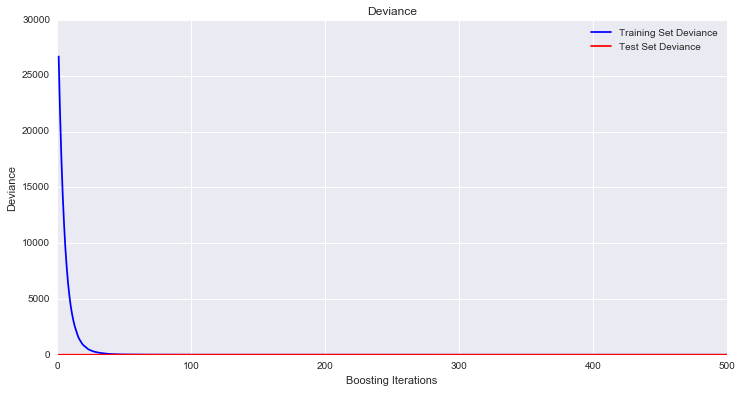

In [229]:
import matplotlib.pyplot as plt
 
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
 
for i, y_pred in enumerate(clf.staged_decision_function(test_X)):
    test_score[i] = clf.loss_(test_y, y_pred)
 
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

As you can see in the previous graph, although the train error keeps going down as we add more trees to our model, the test error remains more or less constant and doesn’t incur in overfitting. This is mainly due to the shrinkage parameter and one of the good features of this algorithm.

Although base trees are easily interpretable when you are adding several of those trees interpretation is more difficult. You usually rely on some measures of the predictive power of each feature. Let’s plot feature importance in predicting the House Value.

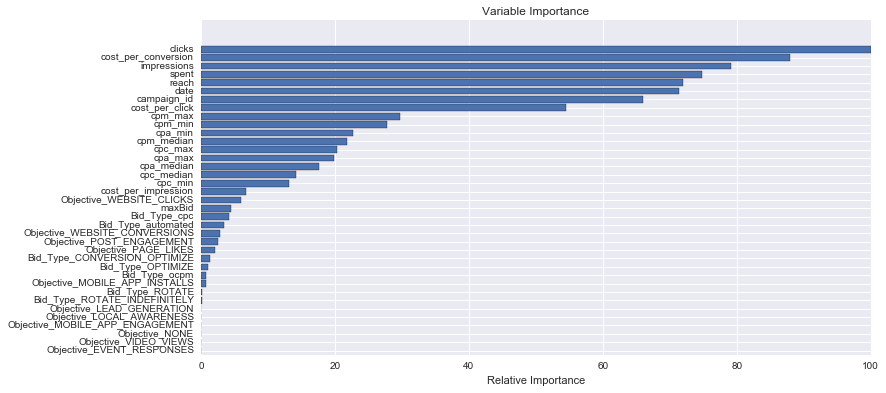

In [231]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [234]:
train_X.columns

Index([u'campaign_id', u'reach', u'cpa_min', u'cpa_max', u'cpa_median',
       u'cpc_min', u'cpc_max', u'cpc_median', u'cpm_min', u'cpm_max',
       u'cpm_median', u'clicks', u'spent', u'impressions', u'date',
       u'cost_per_click', u'cost_per_impression', u'cost_per_conversion',
       u'Objective_EVENT_RESPONSES', u'Objective_LEAD_GENERATION',
       u'Objective_LOCAL_AWARENESS', u'Objective_MOBILE_APP_ENGAGEMENT',
       u'Objective_MOBILE_APP_INSTALLS', u'Objective_NONE',
       u'Objective_PAGE_LIKES', u'Objective_POST_ENGAGEMENT',
       u'Objective_VIDEO_VIEWS', u'Objective_WEBSITE_CLICKS',
       u'Objective_WEBSITE_CONVERSIONS', u'maxBid',
       u'Bid_Type_CONVERSION_OPTIMIZE', u'Bid_Type_OPTIMIZE',
       u'Bid_Type_ROTATE', u'Bid_Type_ROTATE_INDEFINITELY',
       u'Bid_Type_automated', u'Bid_Type_cpc', u'Bid_Type_ocpm'],
      dtype='object')

Once variable importance has been identified we could try to investigate how those variables interact between them. For instance, we can plot the dependence of the target variable with another variable has been averaged over the values of the other variables not being taken into consideration. Some variables present a clear monotonic dependence with the target value, while others seem not very related to the target variable even when they ranked high in the previous plot. This could be signaling an interaction between variables that could be further studied.

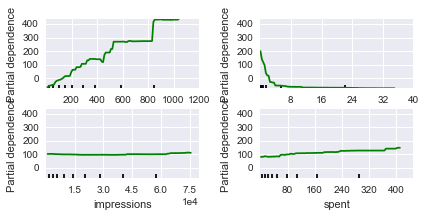

In [242]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
 
fig, axs = plot_partial_dependence(clf, train_X,
                                   features=[11,17,13,12],
                                   feature_names=train_X.columns,
                                   n_cols=2)
 
fig.show((16,16))
#clicks, cost_per_conversion, impressions, spent